In [3]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import OLSInfluence

%matplotlib inline
plt.style.use('ggplot') 
import math

In [5]:
df = pd.read_csv('datasets/auto-mpg.csv',na_values='?')
df=df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [6]:
#creating a model with horsepower as the predictor and mpg as the response
X = sm.add_constant(df.horsepower)
y = df['mpg']
# df['horsepower']=df['horsepower'].astype(float)
df['horsepower'] = pd.to_numeric(df['horsepower'],errors='coerce')
model = sm.OLS(y,X)
estimate = model.fit()
print(estimate.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           7.03e-81
Time:                        18:30:28   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

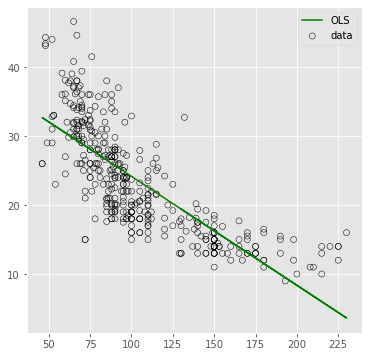

In [8]:
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(X.horsepower.values, estimate.fittedvalues, 'g', label="OLS")
ax.scatter(X.horsepower,y, label="data",facecolors='none',edgecolors='black')
ax.legend()

Text(0.5, 1.0, 'heading')

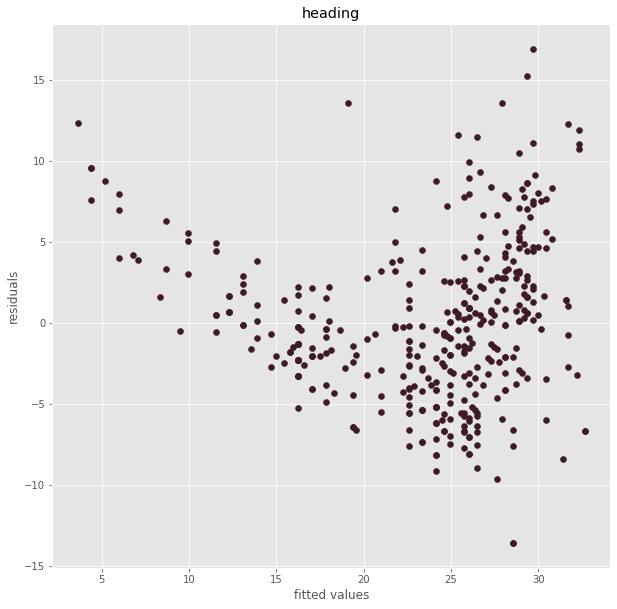

In [9]:
residual_values=estimate.resid.values
fig,ax1=plt.subplots(figsize=(10,10))
ax1.scatter(estimate.fittedvalues,residual_values,facecolors='#3E1929')
ax1.set_xlabel('fitted values')
ax1.set_ylabel('residuals')
ax1.set_title('heading')


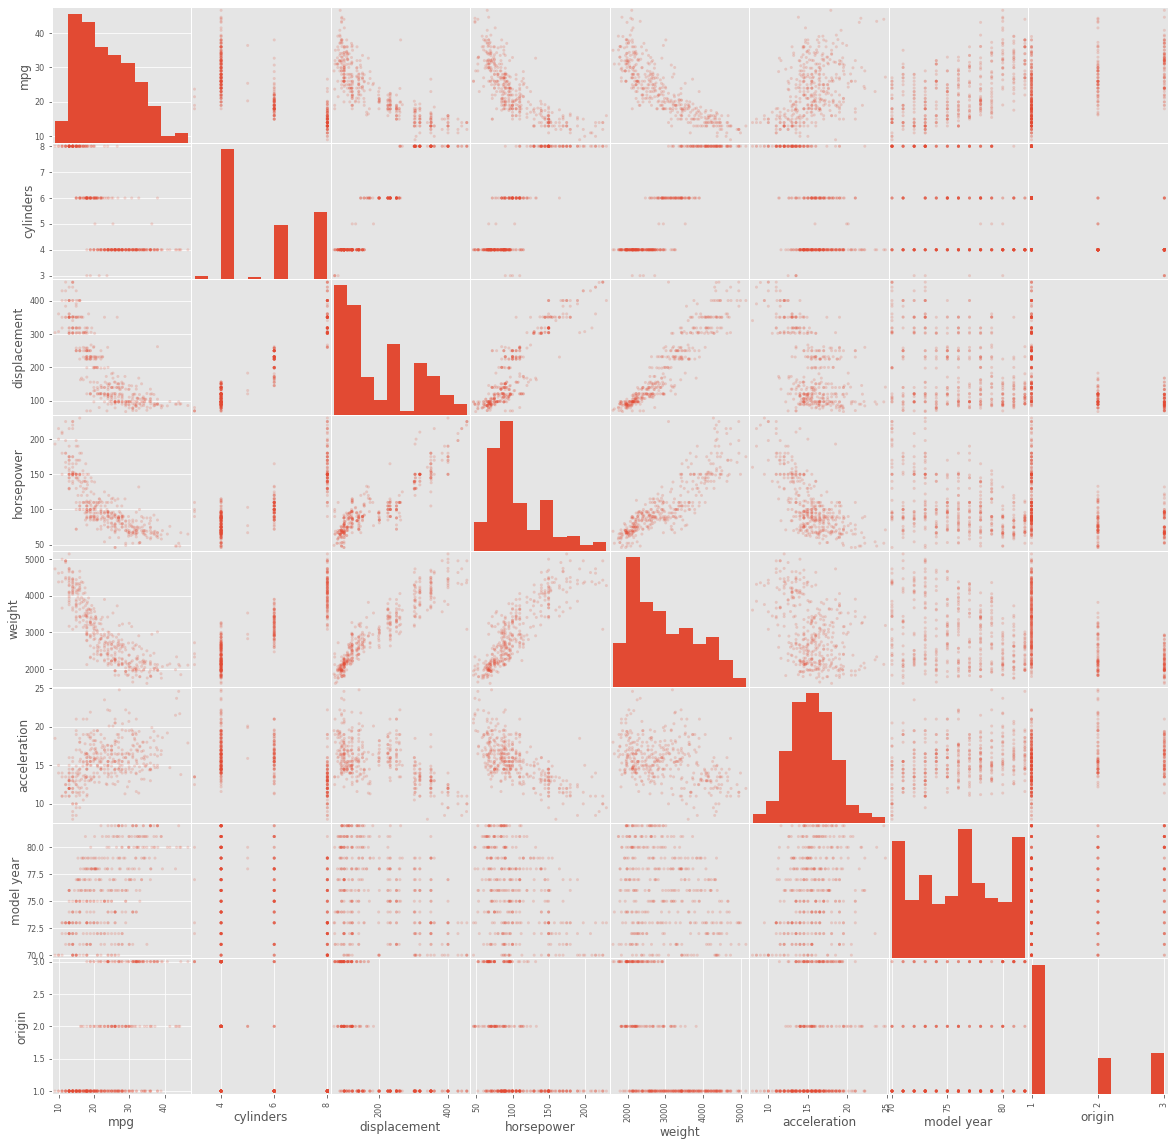

In [10]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,alpha=0.2, figsize=(20,20));

In [11]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [12]:
# Performing multiple linear regression
X=sm.add_constant(df.iloc[:,1:8])
y=df.mpg
# X_mlr=sm.add_constant(X_mlr)
# creating a multiple linear regression model
model_mlr=sm.OLS(y,X)
estimate_mlr = model_mlr.fit()
print(estimate_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 13 Apr 2021   Prob (F-statistic):          2.04e-139
Time:                        18:30:44   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

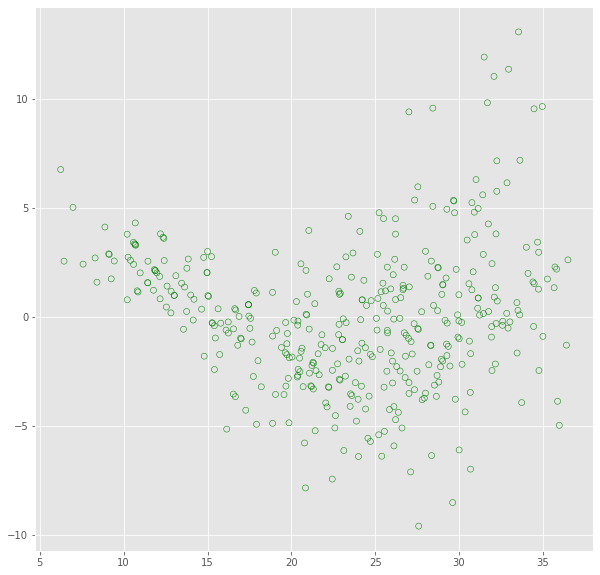

In [15]:
# Diagnostic Plot
resid_mlr=estimate_mlr.resid.values
fig,ax=plt.subplots(figsize=(10,10))
ax.scatter(estimate_mlr.fittedvalues,resid_mlr,facecolors='none',edgecolors='green')

In [14]:
# interaction between cylider and displacement

df['cylinders*displacement']=df.cylinders*df.displacement
X_interaction=sm.add_constant(df[['cylinders','displacement','cylinders*displacement']])
y_i=df.mpg
model=sm.OLS(y_i,X_interaction)
est=model.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     271.0
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           8.35e-95
Time:                        18:30:46   Log-Likelihood:                -1139.7
No. Observations:                 392   AIC:                             2287.
Df Residuals:                     388   BIC:                             2303.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     48

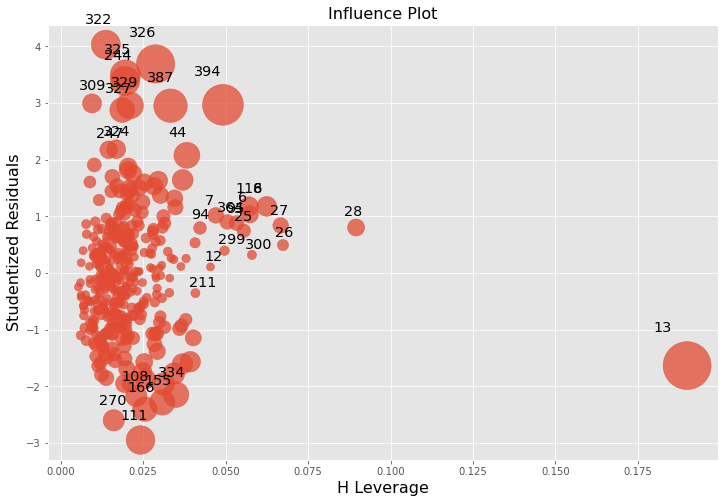

In [17]:
# finding outliers and high leverage points
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(estimate_mlr, alpha  = 0.05, ax = ax, criterion="cooks")

In [16]:
df['hp^2']=df['horsepower']**2
x1=sm.add_constant(df['hp^2'])
est1=sm.OLS(y,x1).fit()
print(est1.summary())
print("\n")
df['horsepower^0.5']=df['horsepower']**0.5
x2=sm.add_constant(df['horsepower^0.5'])
est2=sm.OLS(y,x2).fit()
print(est2.summary())
print('\n')
df['log(horsepower)']=np.log(df['horsepower'])
x3=sm.add_constant(df['log(horsepower)'])
est3=sm.OLS(y,x3).fit()
print(est3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     401.7
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           6.23e-62
Time:                        18:31:02   Log-Likelihood:                -1222.4
No. Observations:                 392   AIC:                             2449.
Df Residuals:                     390   BIC:                             2457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.4658      0.447     68.219      0.0